# Financial Plot

In [9]:
from mplchart.samples import sample_prices
from mplchart.indicators import SMA, EMA, SLOPE, RSI
from mplchart.locator import DateIndexLocator
from mplchart.formatter import DateIndexFormatter

In [10]:
prices = sample_prices(freq="daily")
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600
1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600
1980-12-18,0.091736,0.092167,0.091736,0.091736,73449600
...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300


In [11]:
prices = prices.assign(
    sma20=SMA(20),
    sma50=SMA(50),
    slope = SLOPE(20),
    rsi14 = RSI(14)
)

prices

,open,high,low,close,volume,sma20,sma50,slope,rsi14
date,,,,,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600,NaN,NaN,NaN,NaN
1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800,NaN,NaN,NaN,NaN
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000,NaN,NaN,NaN,NaN
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600,NaN,NaN,NaN,NaN
1980-12-18,0.091736,0.092167,0.091736,0.091736,73449600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,53068000,185.652359,176.423375,0.862896,64.411098
2024-05-30,190.759995,192.179993,190.630005,191.289993,49947900,186.763325,176.732345,0.681618,65.889758
2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,187.736044,177.008785,0.539457,67.294615


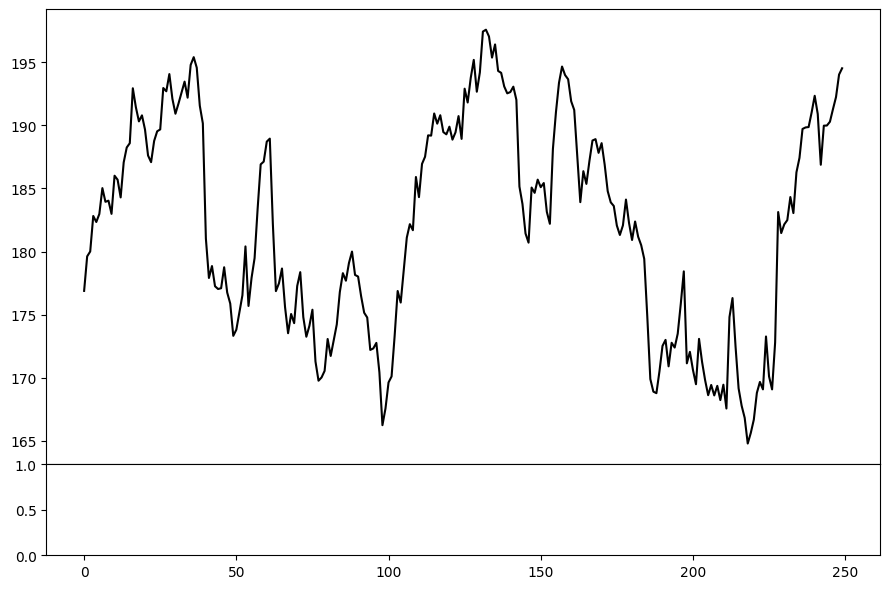

In [16]:
import matplotlib.pyplot as plt

def plot_prices(prices, max_bars=250):
    prices = prices.tail(max_bars)

    nrows = 2
    height_ratios = [1] + [0.2] * (nrows - 1)

    gridspec_kw = dict(height_ratios=height_ratios, hspace=0)
    fig, axes = plt.subplots(
        nrows, sharex=True, tight_layout=True, figsize=(9, 6), gridspec_kw=gridspec_kw
    )

    locator = DateIndexLocator(prices.index)
    formatter = DateIndexFormatter(prices.index)

    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(formatter)

    prices = prices.reset_index()

    axes[0].plot(prices.index, prices.close, label="Close", color="black")


plot_prices(prices)
